In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("../data/Airbnb_Open_Data.csv")

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_3209/1803013805.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Airbnb_Open_Data.csv")


In [156]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [157]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [158]:
# Use Int64 dtype to handle NaN values
df['service_fee_in_$'] = df['service fee'].replace({'\$': '', ',': ''}, regex=True).astype('Int64')

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_3209/1848848668.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['service_fee_in_$'] = df['service fee'].replace({'\$': '', ',': ''}, regex=True).astype('Int64')


In [159]:
# Use Int64 dtype to handle NaN values
df['price_$'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype('Int64')

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_3209/1163041407.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price_$'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype('Int64')


In [160]:
import datetime

In [161]:
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [162]:
df = df.drop(columns=['house_rules','license','price','service fee','NAME','neighbourhood','host name','country code','country'],axis=1)

In [163]:
df_char = df.select_dtypes(include='object')

In [164]:
df_char.head()

,host_identity_verified,neighbourhood group,instant_bookable,cancellation_policy,room type
0,unconfirmed,Brooklyn,False,strict,Private room
1,verified,Manhattan,False,moderate,Entire home/apt
2,NaN,Manhattan,True,flexible,Private room
3,unconfirmed,Brooklyn,True,moderate,Entire home/apt
4,verified,Manhattan,False,moderate,Entire home/apt


In [165]:
df.shape

(102599, 19)

In [166]:
df_num = df.select_dtypes(exclude='object')

In [167]:
df_num.head()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,service_fee_in_$,price_$
0,1001254,80014485718,40.64749,-73.97237,2020.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,193,966
1,1002102,52335172823,40.75362,-73.98377,2007.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,28,142
2,1002403,78829239556,40.80902,-73.94190,2005.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,124,620
3,1002755,85098326012,40.68514,-73.95976,2005.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,74,368
4,1003689,92037596077,40.79851,-73.94399,2009.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,41,204


In [168]:
df_num['year'] = df_num['last review'].dt.year

In [169]:
df_num['month'] = df_num['last review'].dt.month

In [170]:
df_num['day'] = df_num['last review'].dt.day

In [171]:
df_num = df_num.drop(columns=['last review','id','host id'], axis=1)

In [172]:
df_num.head()

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,service_fee_in_$,price_$,year,month,day
0,40.64749,-73.97237,2020.0,10.0,9.0,0.21,4.0,6.0,286.0,193,966,2021.0,10.0,19.0
1,40.75362,-73.98377,2007.0,30.0,45.0,0.38,4.0,2.0,228.0,28,142,2022.0,5.0,21.0
2,40.80902,-73.94190,2005.0,3.0,0.0,NaN,5.0,1.0,352.0,124,620,NaN,NaN,NaN
3,40.68514,-73.95976,2005.0,30.0,270.0,4.64,4.0,1.0,322.0,74,368,2019.0,7.0,5.0
4,40.79851,-73.94399,2009.0,10.0,9.0,0.10,3.0,1.0,289.0,41,204,2018.0,11.0,19.0


In [173]:
df_num.isnull().sum()

lat                                   8
long                                  8
Construction year                   214
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
service_fee_in_$                    273
price_$                             247
year                              15893
month                             15893
day                               15893
dtype: int64

In [174]:
df_char.isnull().sum()

host_identity_verified    289
neighbourhood group        29
instant_bookable          105
cancellation_policy        76
room type                   0
dtype: int64

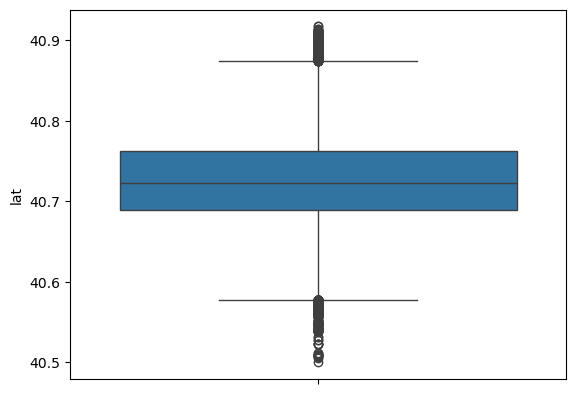

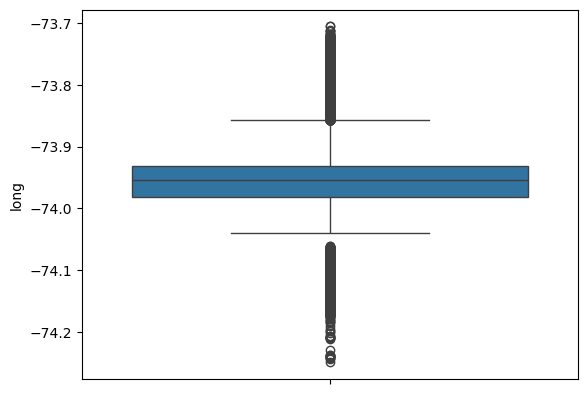

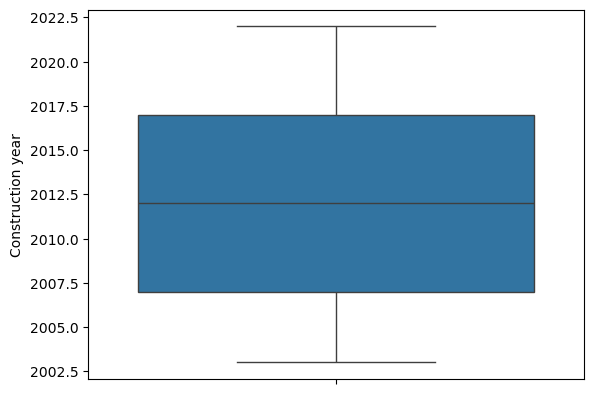

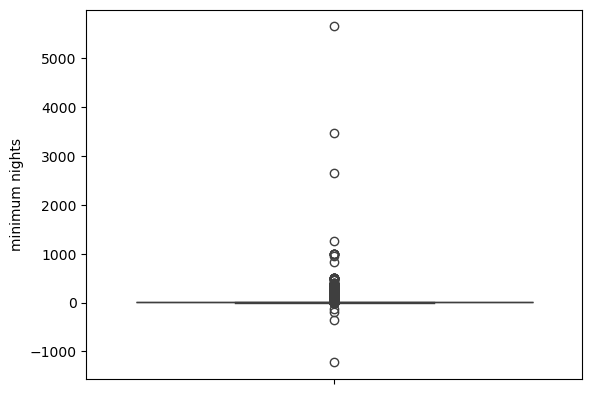

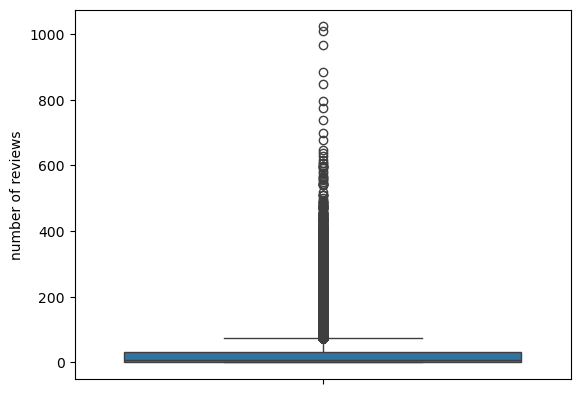

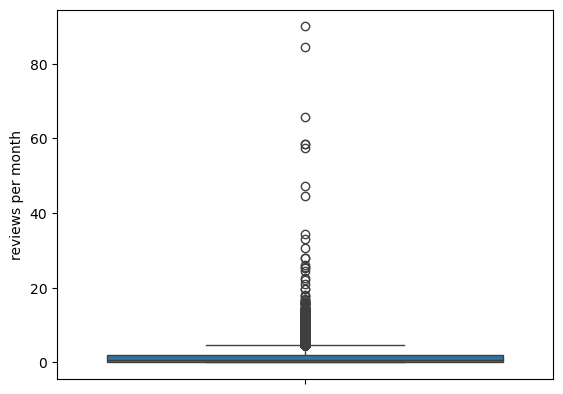

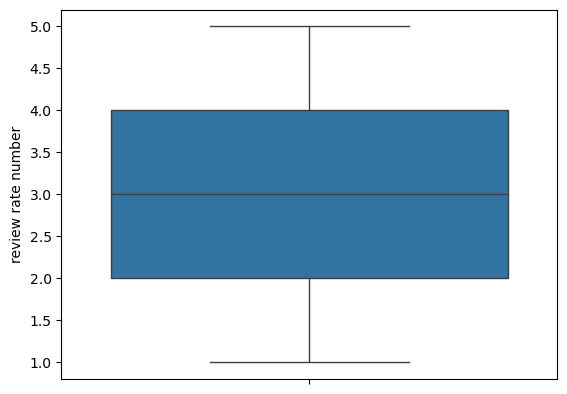

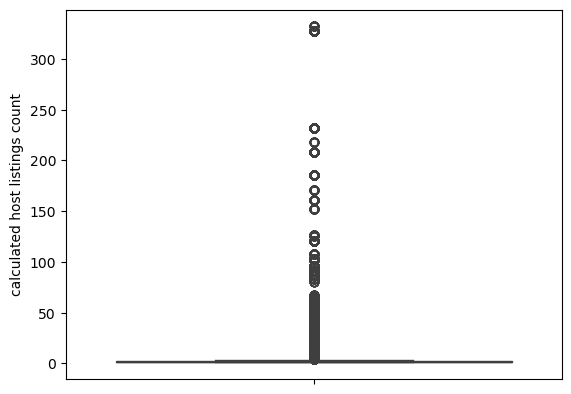

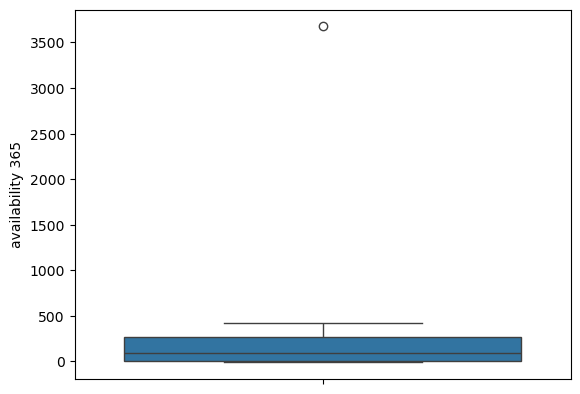

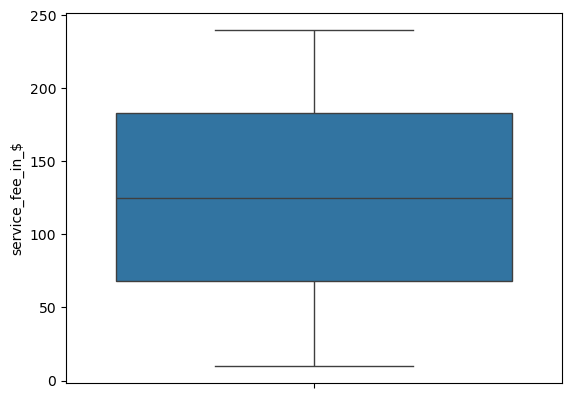

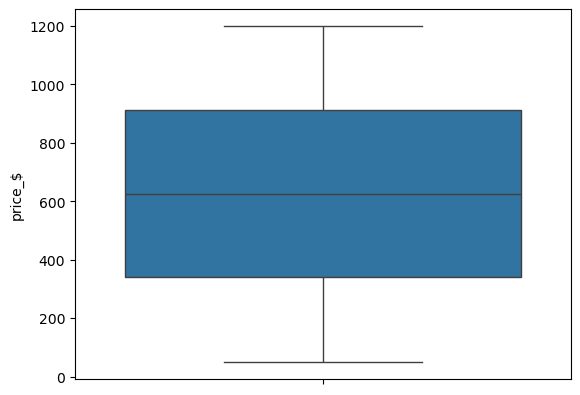

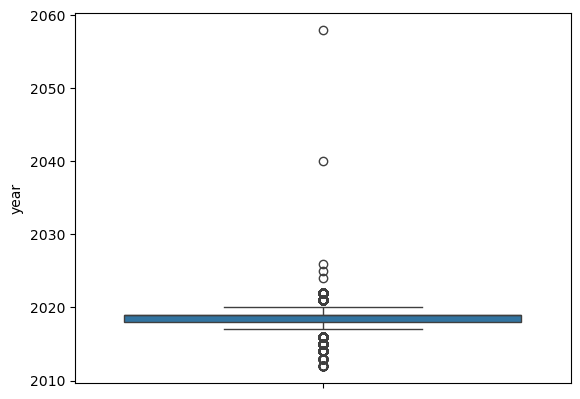

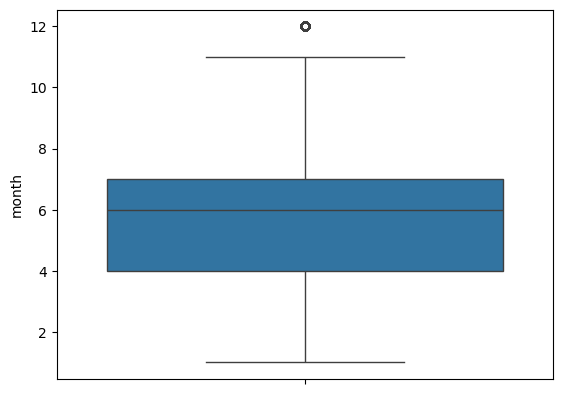

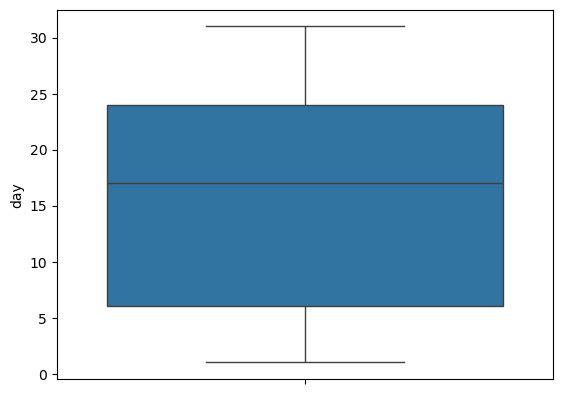

In [175]:
for i in df_num:
    plt.figure()
    sns.boxplot(df_num[i])

In [206]:
import pandas as pd
import numpy as np

# Function to handle outliers using percentile-based clipping
def handle_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# List of numeric columns to clean (based on your data)
columns_to_clean = [
    'minimum nights', 'number of reviews', 'reviews per month', 
    'review rate number', 'calculated host listings count', 
    'availability 365', 'service_fee_in_$', 'price_$'
]

# Handling outliers
df_num = handle_outliers(df_num, columns_to_clean)

# Correcting unrealistic values manually
df_num['year'] = df_num['year'].clip(upper=2024)  # Assuming 2024 is the max realistic year

# Ensuring 'minimum nights' and 'availability 365' are non-negative
df_num['minimum nights'] = df_num['minimum nights'].clip(lower=0)
df_num['availability 365'] = df_num['availability 365'].clip(lower=0)

# Checking for missing values and filling with appropriate values
df.fillna({
    'reviews per month': 0,  # If missing, assume no reviews that month
    'service_fee_in_$': df_num['service_fee_in_$'].median(),  # Fill with median service fee
}, inplace=True)

# Verifying the data after cleaning
# print(df.describe())


In [207]:
df_num.describe(percentiles=[0.01,0.02,0.03,0.08,.1,.2,.3,.4,.5,.6,.7,.8,.9,.05,.98,.99])

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,service_fee_in_$,price_$,year,month,day
count,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000,102326.0,102352.0,86706.000000,86706.000000,86706.000000
mean,40.728094,-73.949644,2012.487464,7.161268,26.669143,1.347565,3.279106,7.056697,141.012452,125.027539,625.286804,2018.996332,5.902002,15.841464
std,0.055857,0.049521,5.765556,10.487608,44.318937,1.517823,1.284657,24.846374,134.736087,66.294633,331.469878,1.661856,3.024888,9.815845
min,40.499790,-74.249840,2003.000000,1.000000,0.000000,0.020000,1.000000,1.000000,0.000000,12.0,61.0,2012.000000,1.000000,1.000000
1%,40.592087,-74.032500,2003.000000,1.000000,0.000000,0.020000,1.000000,1.000000,0.000000,12.0,61.0,2015.000000,1.000000,1.000000
2%,40.615188,-74.012060,2003.000000,1.000000,0.000000,0.030000,1.000000,1.000000,0.000000,15.0,73.0,2015.000000,1.000000,1.000000
3%,40.631497,-74.008093,2003.000000,1.000000,0.000000,0.030000,1.000000,1.000000,0.000000,17.0,84.0,2016.000000,1.000000,1.000000
5%,40.643280,-74.003840,2003.000000,1.000000,0.000000,0.050000,1.000000,1.000000,0.000000,22.0,108.0,2016.000000,1.000000,1.000000
8%,40.658220,-73.998850,2004.000000,1.000000,0.000000,0.070000,1.000000,1.000000,0.000000,28.0,142.0,2017.000000,1.000000,2.000000
10%,40.664720,-73.996370,2005.000000,1.000000,0.000000,0.080000,2.000000,1.000000,0.000000,33.0,165.0,2017.000000,1.000000,2.000000


In [177]:
def outlier(x):
    lower_bound = x.quantile(0.01)  # 1st percentile
    upper_bound = x.quantile(0.99)  # 99th percentile
    return x.clip(lower=lower_bound, upper=upper_bound)

In [178]:
df_num['minimum nights'] = outlier(df_num['minimum nights'])

In [179]:
df_num['number of reviews'] = outlier(df_num['number of reviews'])

In [180]:
df_num['reviews per month'] = outlier(df_num['reviews per month'])

In [181]:
df_num['availability 365'] = outlier(df_num['availability 365'])

In [182]:
df_num['availability 365'] = outlier(df_num['availability 365'])

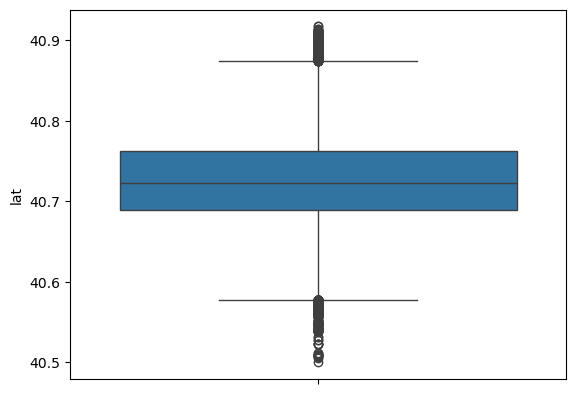

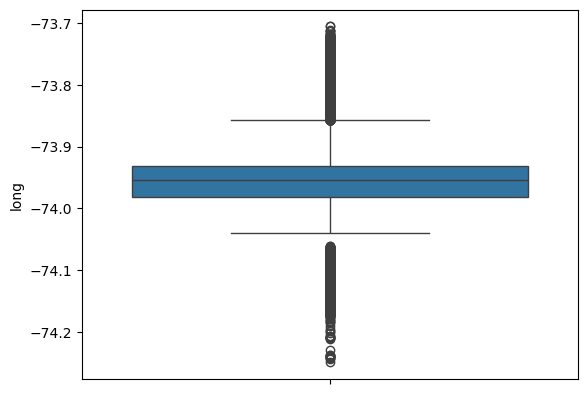

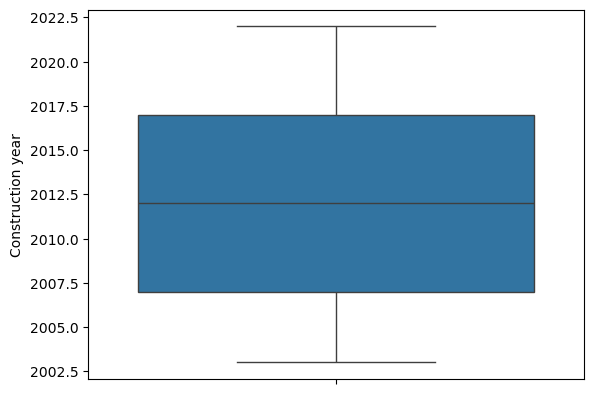

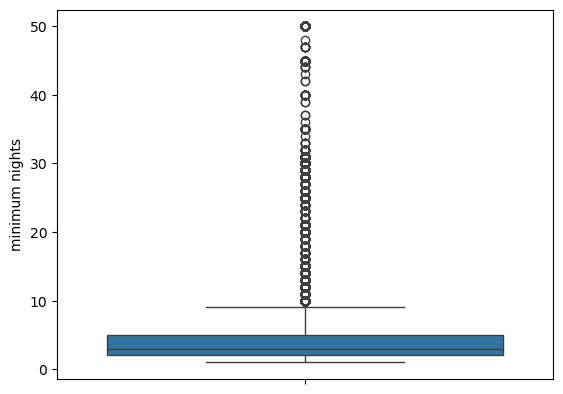

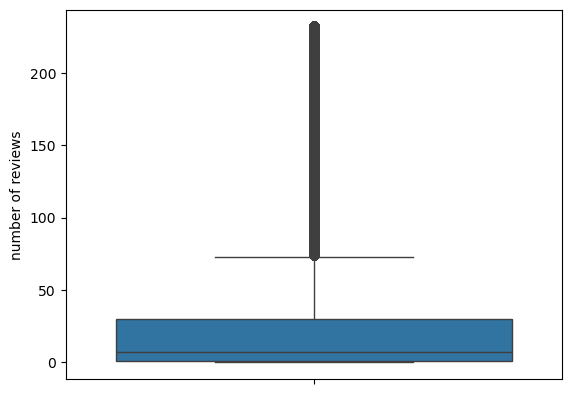

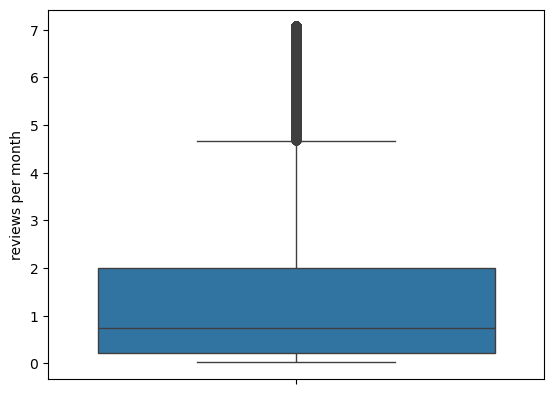

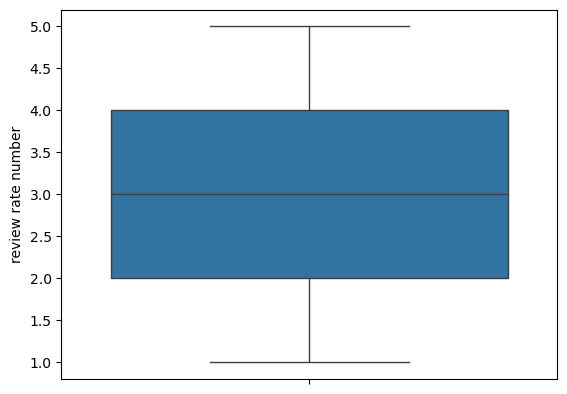

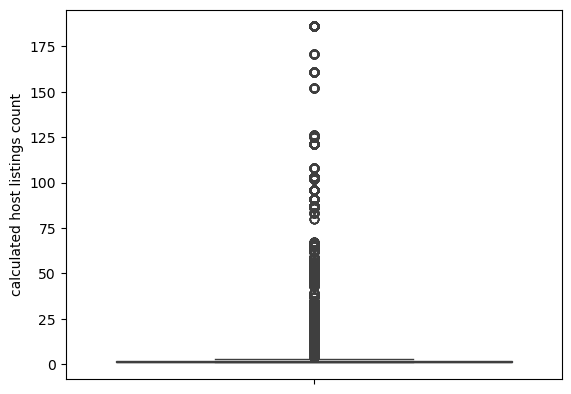

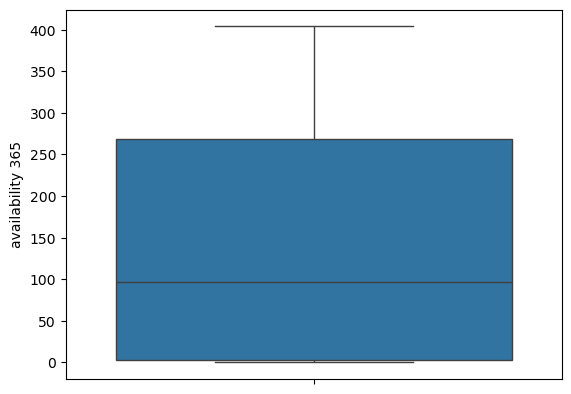

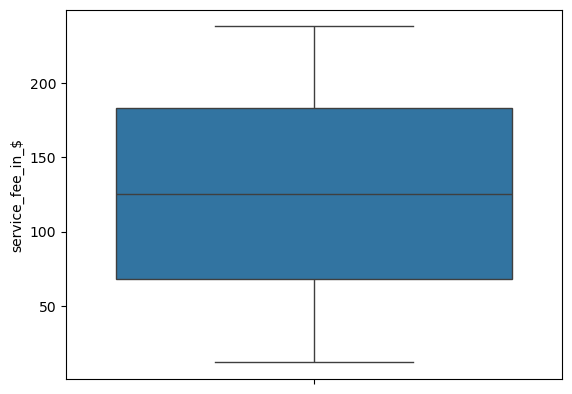

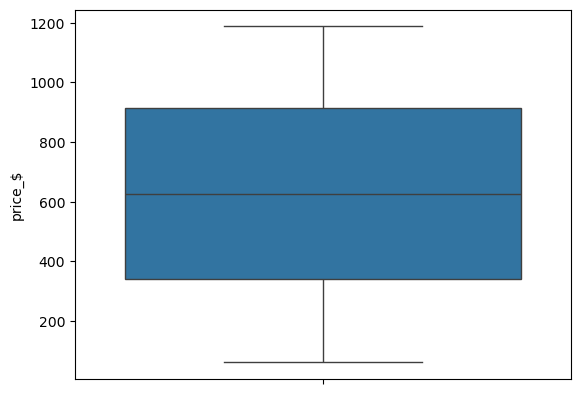

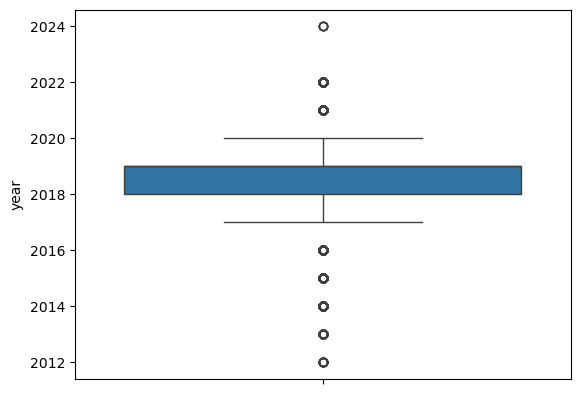

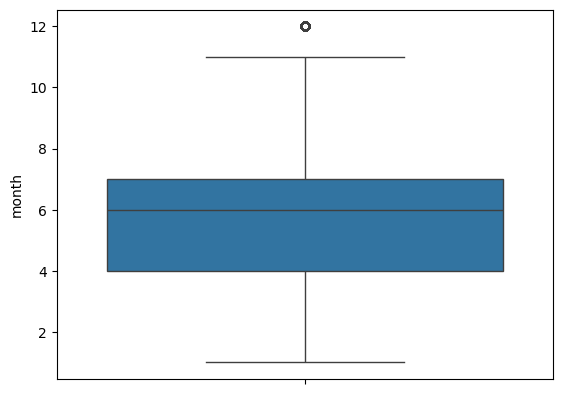

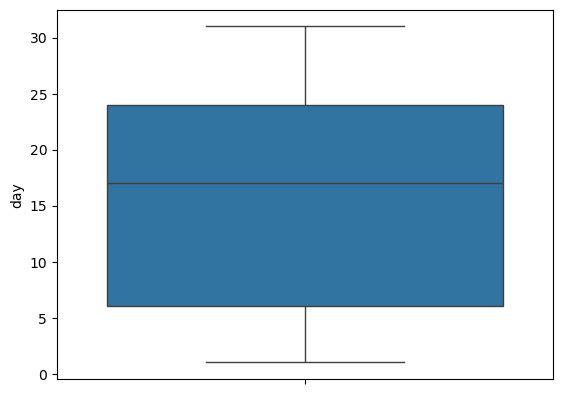

In [208]:
for i in df_num:
    plt.figure()
    sns.boxplot(df_num[i])

/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_3209/626222440.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])
/var/folders/q5/4sgcvsds2rzbyzzy1kb4hgb00000gn/T/ipykernel_3209/626222440.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])
/var/folders/q5/4sgcvs

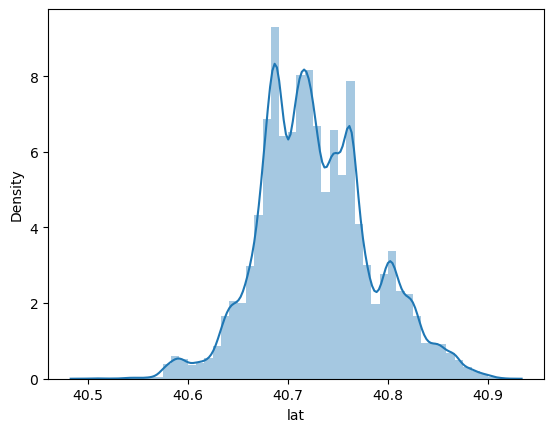

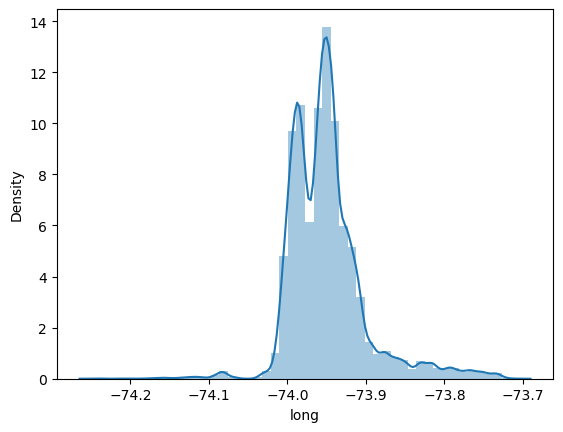

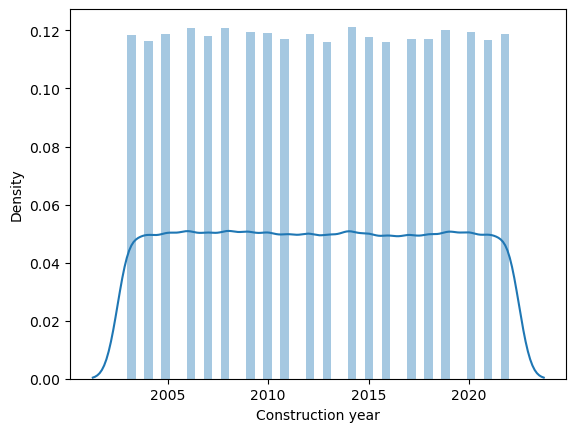

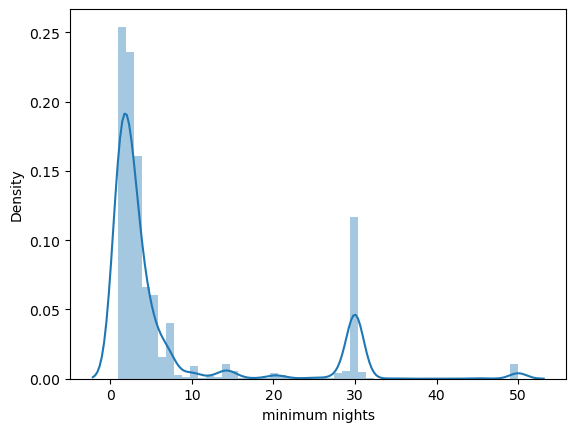

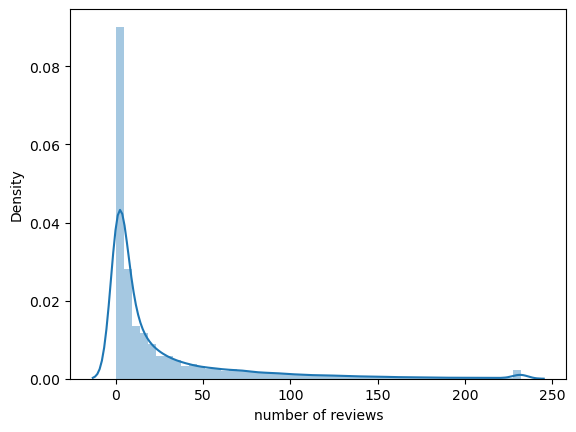

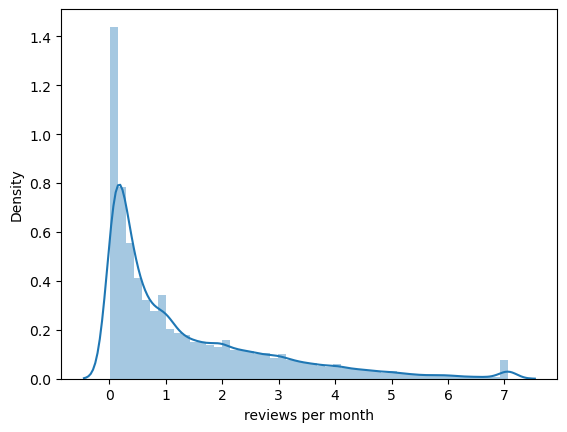

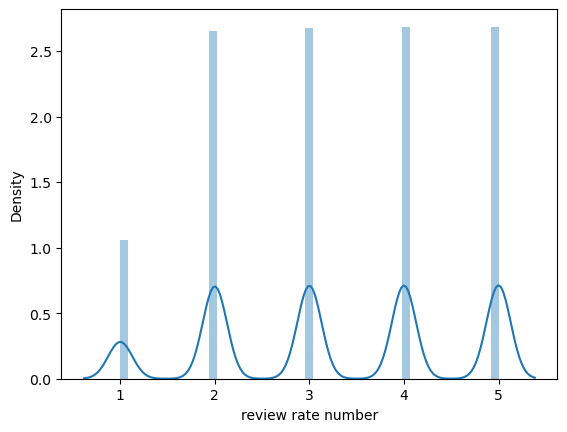

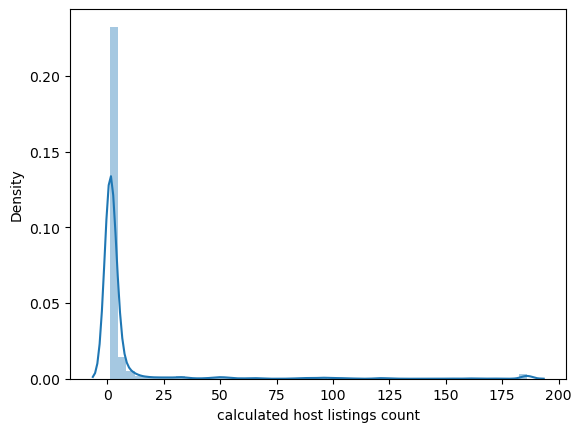

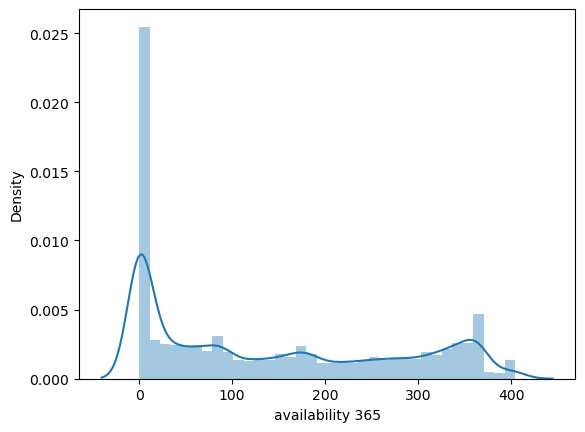

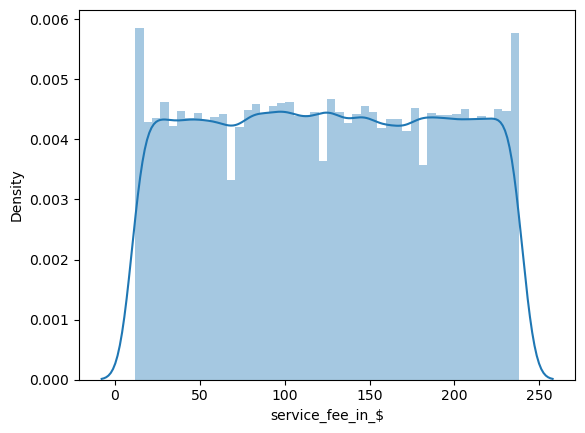

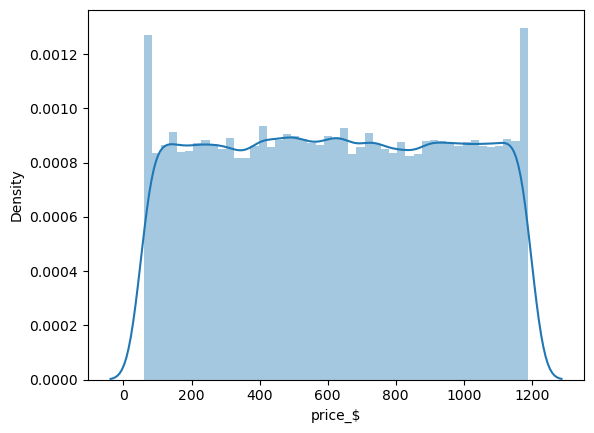

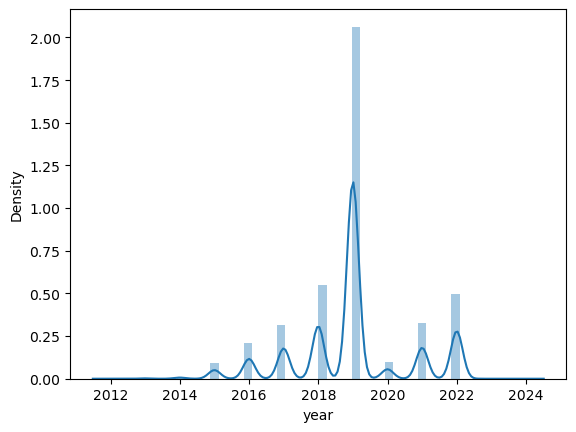

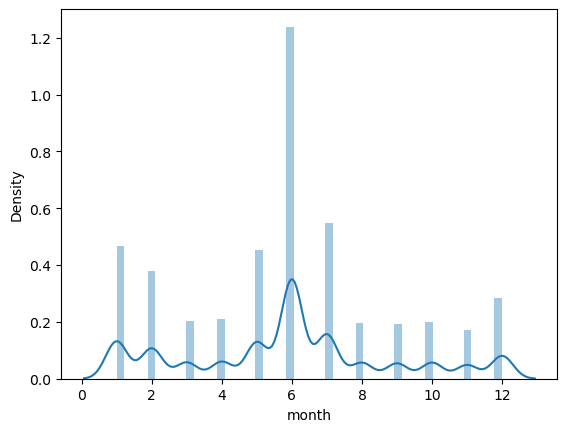

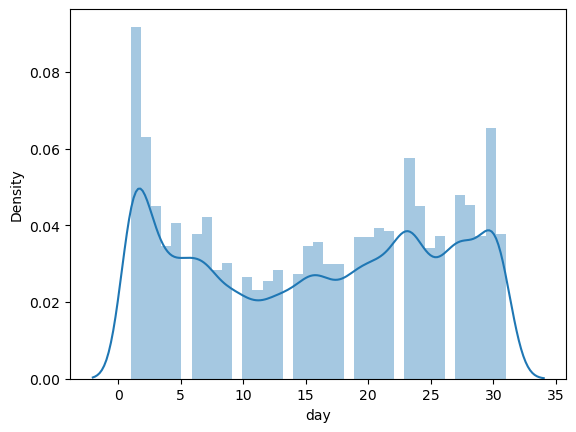

In [209]:
for i in df_num:
    plt.figure()
    sns.distplot(df_num[i])

In [210]:
x = pd.concat([df_num,df_char], axis=1)

In [211]:
y = x['price_$']

In [212]:
y.median()

624.0

In [213]:
y = y.fillna(624.0)

In [214]:
y.isnull().sum()

0

In [215]:
final_x = x.drop('price_$', axis=1)

In [216]:
final_x

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,service_fee_in_$,year,month,day,host_identity_verified,neighbourhood group,instant_bookable,cancellation_policy,room type
0,40.64749,-73.97237,2020.0,10.0,9.0,0.21,4.0,6.0,286.0,193,2021.0,10.0,19.0,unconfirmed,Brooklyn,False,strict,Private room
1,40.75362,-73.98377,2007.0,30.0,45.0,0.38,4.0,2.0,228.0,28,2022.0,5.0,21.0,verified,Manhattan,False,moderate,Entire home/apt
2,40.80902,-73.94190,2005.0,3.0,0.0,NaN,5.0,1.0,352.0,124,NaN,NaN,NaN,NaN,Manhattan,True,flexible,Private room
3,40.68514,-73.95976,2005.0,30.0,232.0,4.64,4.0,1.0,322.0,74,2019.0,7.0,5.0,unconfirmed,Brooklyn,True,moderate,Entire home/apt
4,40.79851,-73.94399,2009.0,10.0,9.0,0.10,3.0,1.0,289.0,41,2018.0,11.0,19.0,verified,Manhattan,False,moderate,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,40.70862,-73.94651,2003.0,1.0,0.0,NaN,3.0,1.0,227.0,169,NaN,NaN,NaN,verified,Brooklyn,False,flexible,Private room
102595,40.80460,-73.96545,2016.0,1.0,1.0,0.02,2.0,2.0,395.0,167,2015.0,7.0,6.0,unconfirmed,Manhattan,True,moderate,Private room
102596,40.67505,-73.98045,2009.0,3.0,0.0,NaN,5.0,1.0,342.0,198,NaN,NaN,NaN,unconfirmed,Brooklyn,True,moderate,Private room
102597,40.74989,-73.93777,2015.0,2.0,5.0,0.10,3.0,1.0,386.0,109,2015.0,10.0,11.0,unconfirmed,Queens,True,strict,Entire home/apt


In [217]:
final_x_char = final_x.select_dtypes(include='object')
final_x_num = final_x.select_dtypes(exclude='object')

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [219]:
pre = ColumnTransformer(
    transformers=(
        ('num', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='median')),
            ('scale', MinMaxScaler())
        ]), final_x_num.columns),
        
        ('cat', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='most_frequent')),
            ('encode', OneHotEncoder())
        ]),final_x_char.columns)
    )
)

In [220]:
pipeline = Pipeline(steps=[
    ('pre', pre),
    ('model', LinearRegression())
])

In [221]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [222]:
x_train, x_test, y_train, y_test = train_test_split(final_x,y,test_size=0.2,random_state=0)

In [223]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=(('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['lat', 'long', 'Construction year', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',
       'service_fee_in_$', 'year', 'month', 'day'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder())]),
                                                  Index(['host_identity_verified', 'neighbourhood group', 'instant_bookable',
       'cancellation_policy', 'room type'],
      dtype='object'))))),
                ('model', LinearRegression())])

In [224]:
y_pred = pipeline.predict(x_test)

In [225]:
metrics.r2_score(y_test,y_pred)

0.9953147446723233

In [226]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2.6321530823586743
Mean Squared Error (MSE): 508.4730722408778
Root Mean Squared Error (RMSE): 22.54934749035718
R² Score: 0.9953147446723233


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [203]:
# Mean Absolute Error (MAE): 2.6339112517894128
# Mean Squared Error (MSE): 508.49095115985784
# Root Mean Squared Error (RMSE): 22.549743926702536
# R² Score: 0.9953205124395255

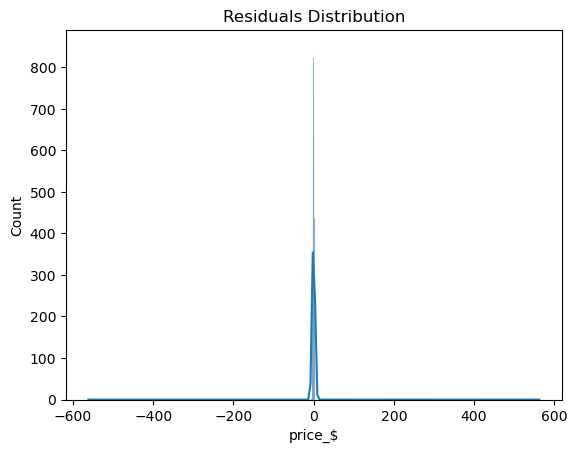

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [228]:
feature_importance = pipeline.named_steps['model'].coef_
feature_names = x_train.columns

for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")


lat: 1.1507
long: 1.2299
Construction year: -0.2627
minimum nights: 0.2142
number of reviews: 0.2505
reviews per month: 0.2111
review rate number: -0.1488
calculated host listings count: -0.7432
availability 365: 0.5260
service_fee_in_$: 1127.6736
year: -0.8276
month: 0.0551
day: -0.1141
host_identity_verified: 39562552757718.7656
neighbourhood group: 39562552757718.5859
instant_bookable: -30186404954206.8750
cancellation_policy: -30186404954206.4727
room type: -30186404954206.8320
